# ACF and PACF
# Autocorrelation Function / Partial Autocorrelation Function

## Perform standard imports and load datasets

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load a non-stationary dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/airline_passengers.csv',
                  index_col='Month',parse_dates=True)

df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/DailyTotalFemaleBirths.csv',
                  index_col='Date',parse_dates=True)
df2.index.freq = 'D'

# Lag Plots

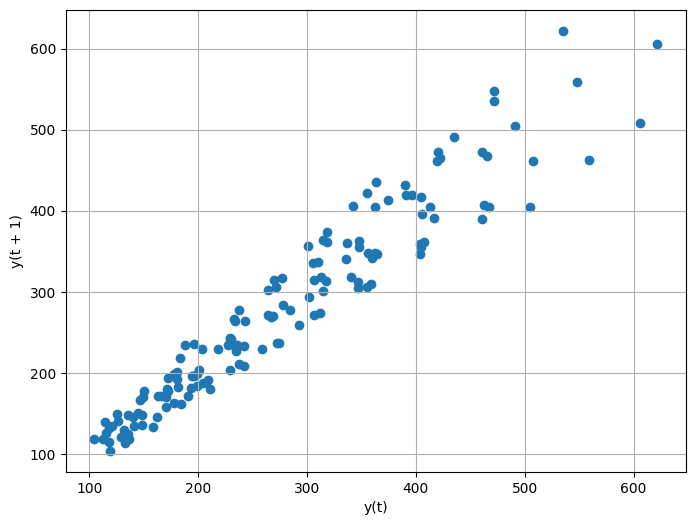

In [2]:
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 6))  # Set width and height in inches
lag_plot(df1['Thousands of Passengers'])
plt.grid(True)  # Add grid to the plot
plt.show()

Visually this shows evidence of a very strong autocorrelation; as $y_t$ values increase, nearby (lagged) values also increase.

Now let's look at the stationary <strong>Daily Total Female Births</strong> dataset:

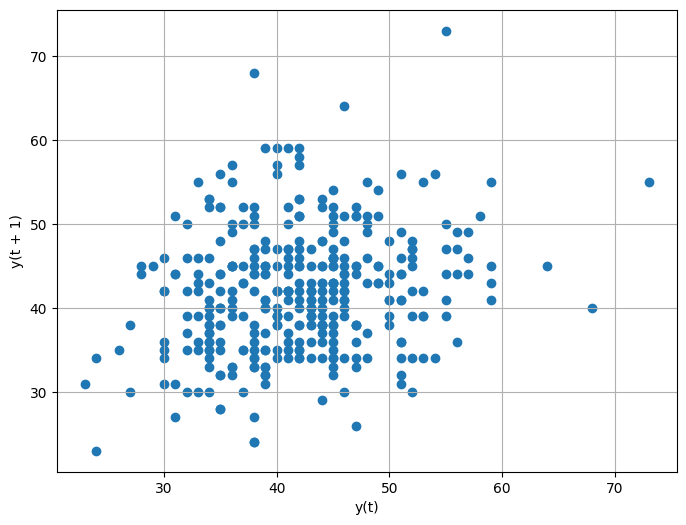

In [3]:
plt.figure(figsize=(8, 6))  # Set width and height in inches
lag_plot(df2['Births'])
plt.grid(True)  # Add grid to the plot
plt.show()

As expected, there is little evidence of autocorrelation here.

## ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

For example, consider the stationary <strong>Daily Total Female Births</strong> dataset:

In [4]:
# Import the models we'll be using in this section

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

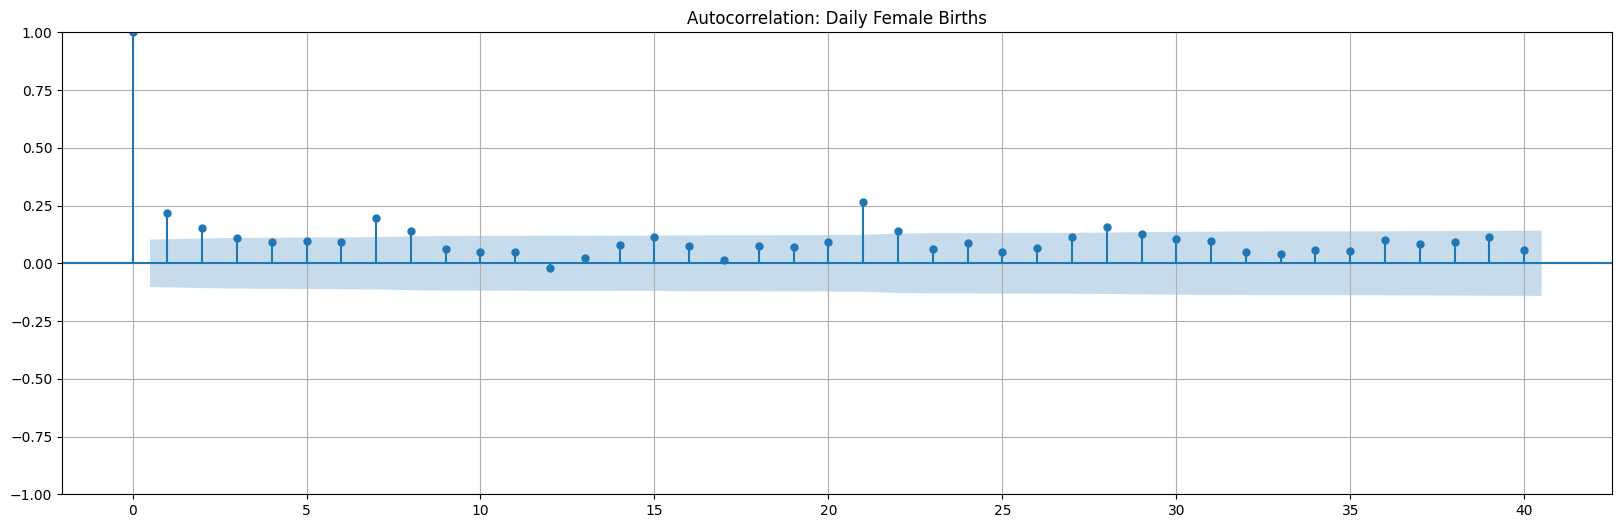

In [6]:
# Now let's plot the autocorrelation at different lags
lags = 40
fig, ax = plt.subplots(figsize=(20, 6))  # Create fig and ax explicitly
plot_acf(df2['Births'], lags = lags, title='Autocorrelation: Daily Female Births', ax=ax)
ax.grid(True)  # Optional: ensures grid is shown
plt.show()

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value $y_0$ is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

Next we'll look at non-stationary data with the <strong>Airline Passengers</strong> dataset:

In [7]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

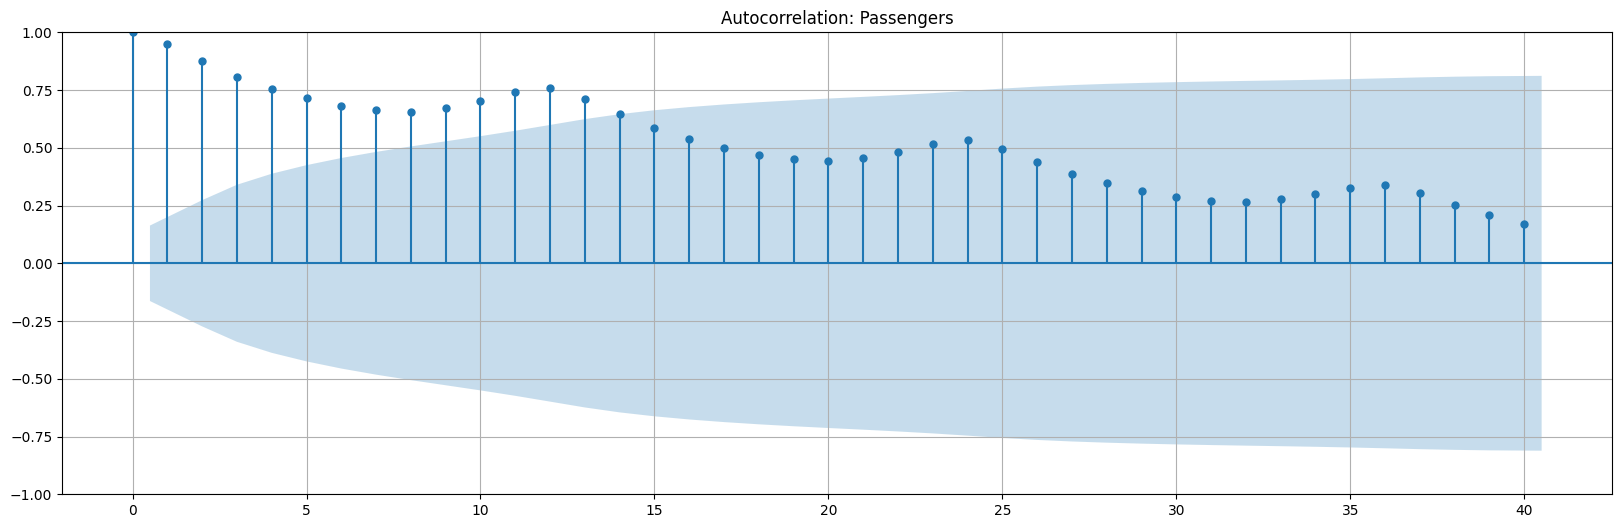

In [8]:
lags = 40
fig, ax = plt.subplots(figsize=(20, 6))  # Create fig and ax explicitly
plot_acf(df1['Thousands of Passengers'], lags = lags, title='Autocorrelation: Passengers', ax=ax)
ax.grid(True)  # Optional: ensures grid is shown
plt.show()

This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

## PACF Plots
Partial autocorrelations work best with stationary data. Let's look first at <strong>Daily Total Female Births</strong>:

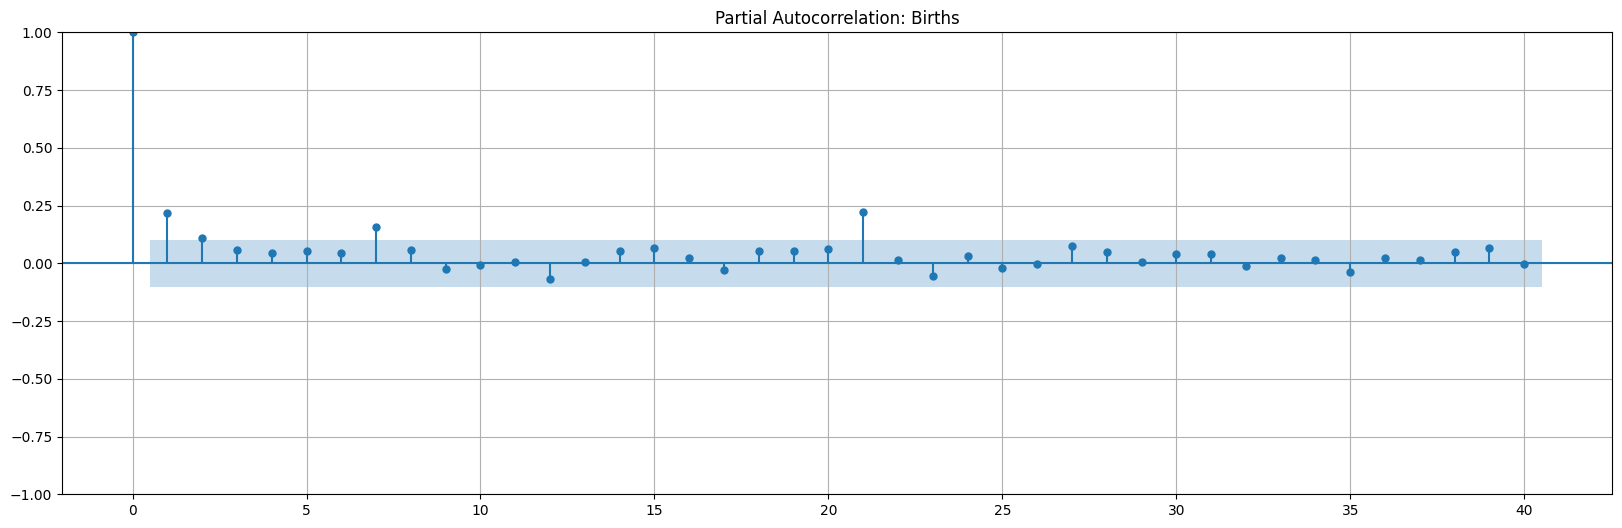

In [9]:
lags = 40
fig, ax = plt.subplots(figsize=(20, 6))  # Create fig and ax explicitly
plot_pacf(df2['Births'], lags = lags, title='Partial Autocorrelation: Births', ax=ax)
ax.grid(True)  # Optional: ensures grid is shown
plt.show()

To make the <strong>Airline Passengers</strong> data stationary, we'll first apply <em>differencing</em>:

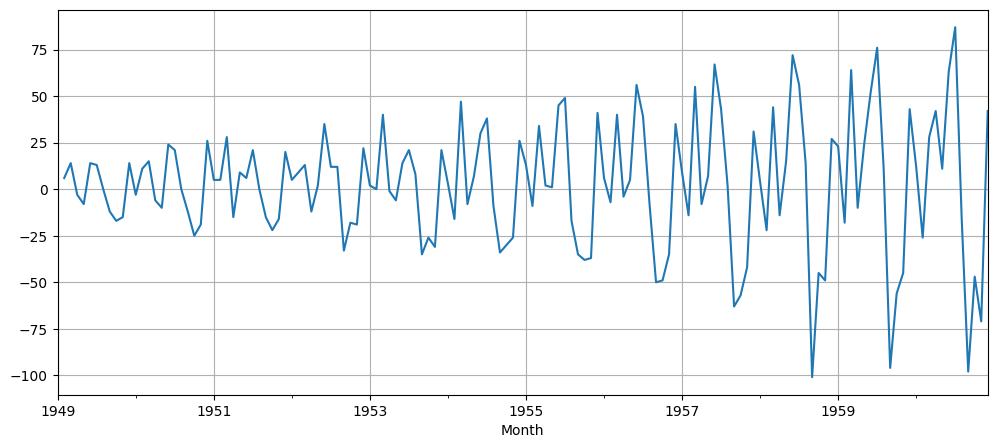

In [10]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'], k_diff = 1)
df1['d1'].plot(figsize=(12,5), grid = True);

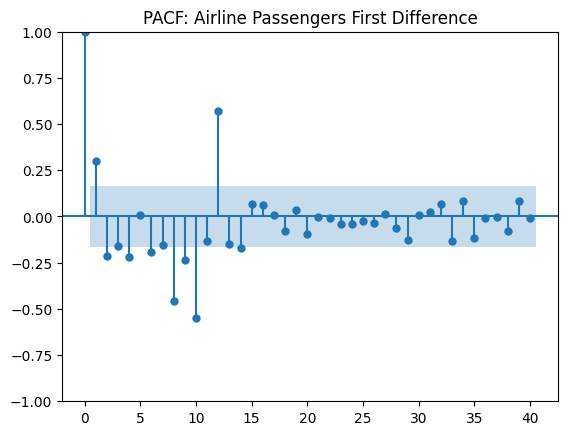

In [11]:
plot_pacf(df1['d1'].dropna(),title = 'PACF: Airline Passengers First Difference', lags = 40);

In [12]:
# In summary:

# ACF (Autocorrelation Function) — "Total Relationship"

# Tells you how much today is related to the past.
# At lag 1: "Is today like yesterday?"
# At lag 2: "Is today like two days ago?" (including the influence from yesterday)
# It includes both direct and indirect relationships.

# -------

# PACF (Partial Autocorrelation Function) — "Direct Relationship"
# Tells you how much today is related to the past, after removing the middle steps.
# At lag 2: "Is today directly like two days ago, ignoring yesterday?"
# It shows only the pure/direct connection between points that are a few steps apart.